In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
import seaborn as sns
import statsmodels.formula.api as smf
from ml_metrics import rmse
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("delivery_time.csv")
#data.head()
Delivery_data=data.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'})
Delivery_data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#Structure of data
type(Delivery_data)
Delivery_data.shape

(21, 2)

In [5]:
#data types
Delivery_data.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [6]:
#Checking Null values
Delivery_data.isnull().sum()

#NO Null Values

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [7]:
Delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
#Print the duplicated rows
Delivery_data[Delivery_data.duplicated()]

#NO Duplicate values in any rows 

,Delivery_Time,Sorting_Time


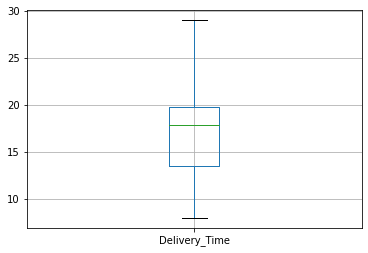

In [10]:
#Box plot
Delivery_data.boxplot(column=['Delivery_Time'])
#No outliers in Delivery_Time column

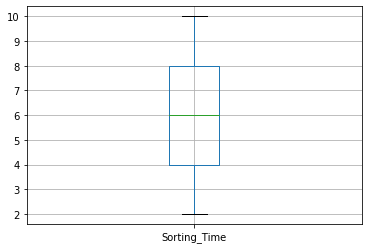

In [11]:
#Box plot
Delivery_data.boxplot(column=['Sorting_Time'])
#No outliers in Sorting_Time column

In [12]:
#Descriptive stat of Delivery_Time
Delivery_data['Delivery_Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery_Time, dtype: float64

In [13]:
#Descriptive stat of Sorting_Time
Delivery_data['Sorting_Time'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting_Time, dtype: float64

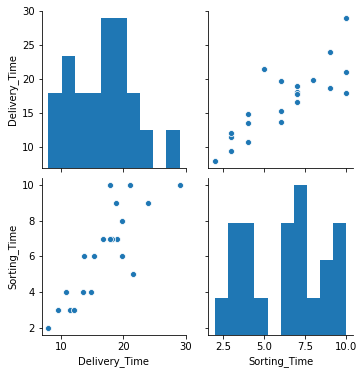

In [14]:
# Create the default pairplot
sns.pairplot(Delivery_data)

In [17]:
Delivery_data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [46]:
#Building our first model
model1=smf.ols("Delivery_Time~Sorting_Time",data=Delivery_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           3.98e-06
Time:                        17:24:00   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Building our second model(log transformation)
model2=smf.ols("Delivery_Time~np.log(Sorting_Time)",data=Delivery_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           2.64e-06
Time:                        17:24:08   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Building our third model(Exponential transformation)
model3=smf.ols("np.log(Delivery_Time)~Sorting_Time",data=Delivery_data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Mon, 28 Sep 2020   Prob (F-statistic):           1.59e-06
Time:                           17:24:16   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Building our fourth model(Quadratic model)
Delivery_data["Sorting_Time_sq"] = Delivery_data.Sorting_Time*Delivery_data.Sorting_Time
model4=smf.ols("Delivery_Time~Sorting_Time+Sorting_Time_sq",data=Delivery_data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           2.39e-05
Time:                        17:24:29   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5222      4.160      0.847      0.408      -5.217      12.261
Sorting_Time        2.8130      1.461      1.926      0.070      -0.256       5.882
Sorting_Time_sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Storing R^2 values in a data frame
rsqr_model1=model1.rsquared
rsqr_model2=model2.rsquared
rsqr_model3=model3.rsquared
rsqr_model4=model4.rsquared

d1={'Model':['model1','model2','model3','model4'],'R^2 values':[rsqr_model1,rsqr_model2,rsqr_model3,rsqr_model4]}
rsqr_frame=pd.DataFrame(d1)
rsqr_frame
#After Analysis of all 4 models we conclude model3 has highest R^2 value so we choose model3 as our final model 

,Model,R^2 values
0,model1,0.682271
1,model2,0.695443
2,model3,0.710948
3,model4,0.693440


In [50]:
#After Analysis of all 4 models we conclude model3 has highest R^2 value so we choose model3 as our final model
pred_Model3_log=model3.predict(Delivery_data.Sorting_Time)
pred_Model3=np.exp(pred_Model3_log) # as we have used log(AT) in preparing model so we need to convert it back
rmse(pred_Model3,Delivery_data.Delivery_Time)

2.9402503230562007

In [51]:
#Predicted delivery time using sorting time 
pred_Model3.head()

0    23.972032
1    12.725123
2    15.716034
3    21.570707
4    23.972032
dtype: float64

Text(0, 0.5, 'Delivery_Time')

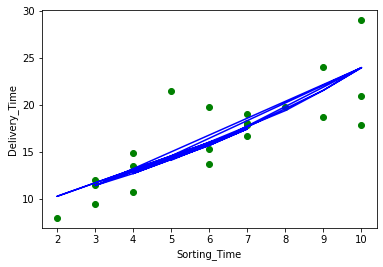

In [52]:
# Visualization of regresion line over the scatter plot YearsofExperience and Salary
plt.scatter(x=Delivery_data['Sorting_Time'],y=Delivery_data['Delivery_Time'],color='green');plt.plot(Delivery_data['Sorting_Time'],pred_Model3,color='blue');plt.xlabel('Sorting_Time');plt.ylabel('Delivery_Time')

Text(0, 0.5, 'Standardized Residual')

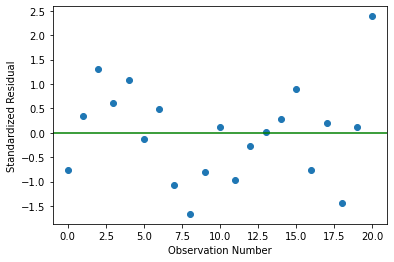

In [53]:
# so we will conclude the model3 has highest R^2 value 
# getting residuals of the entire data set
resid = model3.resid_pearson 
resid
plt.plot(resid,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual Delivery_Time')

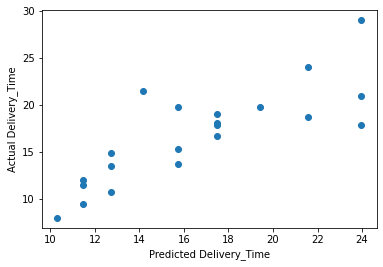

In [54]:
# Predicted vs actual values
plt.scatter(x=pred_Model3,y=Delivery_data.Delivery_Time);plt.xlabel("Predicted Delivery_Time");plt.ylabel("Actual Delivery_Time")